In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown,zipfile,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
import plotly.express as px
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/FORACSTING_PROJECT_DATA/DataCoSupplyChainDataset.csv', encoding='latin-1')
tokenize_log_data=pd.read_csv('/content/drive/MyDrive/datasets/FORACSTING_PROJECT_DATA/tokenized_access_logs.csv')
discription_data=pd.read_csv('/content/drive/MyDrive/datasets/FORACSTING_PROJECT_DATA/DescriptionDataCoSupplyChain.csv')

In [ ]:
pd.set_option('display.max_columns', 500)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
supply_chain_data=data.copy()
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 
          'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
           'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price',
           'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

Data=data[FeatureList]
Data.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
Forcast=Data[['order date (DateOrders)','Sales']]

In [ ]:
Data.isnull().sum()

Type                               0
Benefit per order                  0
Sales per customer                 0
Delivery Status                    0
Late_delivery_risk                 0
Category Name                      0
Customer City                      0
Customer Country                   0
Customer Id                        0
Customer Segment                   0
Customer State                     0
Customer Zipcode                   3
Department Name                    0
Latitude                           0
Longitude                          0
Market                             0
Order City                         0
Order Country                      0
Order Customer Id                  0
order date (DateOrders)            0
Order Id                           0
Order Item Cardprod Id             0
Order Item Discount                0
Order Item Discount Rate           0
Order Item Id                      0
Order Item Product Price           0
Order Item Profit Ratio            0
O

There are lots of values missing in Order Zipcode feature and Discription so we delete there features

In [ ]:
Data.drop(columns=['Order Zipcode','Product Description','Product Image',
                   'shipping date (DateOrders)','order date (DateOrders)'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Data.isnull().sum()

Type                        0
Benefit per order           0
Sales per customer          0
Delivery Status             0
Late_delivery_risk          0
Category Name               0
Customer City               0
Customer Country            0
Customer Id                 0
Customer Segment            0
Customer State              0
Customer Zipcode            3
Department Name             0
Latitude                    0
Longitude                   0
Market                      0
Order City                  0
Order Country               0
Order Customer Id           0
Order Id                    0
Order Item Cardprod Id      0
Order Item Discount         0
Order Item Discount Rate    0
Order Item Id               0
Order Item Product Price    0
Order Item Profit Ratio     0
Order Item Quantity         0
Sales                       0
Order Item Total            0
Order Profit Per Order      0
Order Region                0
Order State                 0
Order Status                0
Product Ca

In [ ]:
Data=Data[Data['Customer Zipcode'].notnull()]
Data.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,Standard Class


In [ ]:
Z=['Type','Delivery Status','Customer Segment']
Data[Data.select_dtypes('object').drop(columns=Z).columns]=Data[Data.select_dtypes('object').drop(columns=Z).columns].apply(LabelEncoder().fit_transform)

In [ ]:
Data.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,40,65,1,20755,Consumer,34,725.0,4,18.251453,-66.037056,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,2,1360,73,78,327.75,0,3
1,TRANSFER,-249.089996,311.359985,Late delivery,1,40,65,1,19492,Consumer,34,725.0,4,18.279451,-66.037064,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,5,1360,73,78,327.75,0,3
2,CASH,-247.779999,309.720001,Shipping on time,0,40,451,0,19491,Consumer,3,95125.0,4,37.292233,-121.881279,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1,1360,73,78,327.75,0,3
3,DEBIT,22.860001,304.809998,Advance shipping,0,40,284,0,19490,Home Office,3,90027.0,4,34.125946,-118.291016,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,2,1360,73,78,327.75,0,3
4,PAYMENT,134.210007,298.250000,Advance shipping,0,40,65,1,19489,Corporate,34,725.0,4,18.253769,-66.037048,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,6,1360,73,78,327.75,0,3


In [ ]:
enc=OneHotEncoder()
X=enc.fit_transform(np.array(Data['Type']).reshape((-1,1))).toarray()

In [ ]:
Data[[ i.split('_')[1] for i in enc.get_feature_names()]]=X

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
enc=OneHotEncoder()
X=enc.fit_transform(np.array(Data[Z[1]]).reshape((-1,1))).toarray()
Data[[ i.split('_')[1] for i in enc.get_feature_names()]]=X

enc=OneHotEncoder()
X=enc.fit_transform(np.array(Data[Z[2]]).reshape((-1,1))).toarray()
Data[[ i.split('_')[1] for i in enc.get_feature_names()]]=X


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Data.drop(columns=Z,inplace=True)

In [ ]:
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,91.250000,314.640015,0,40,65,1,20755,34,725.0,4,18.251453,-66.037056,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,2,1360,73,78,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-249.089996,311.359985,1,40,65,1,19492,34,725.0,4,18.279451,-66.037064,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,5,1360,73,78,327.75,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-247.779999,309.720001,0,40,451,0,19491,3,95125.0,4,37.292233,-121.881279,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1,1360,73,78,327.75,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,22.860001,304.809998,0,40,284,0,19490,3,90027.0,4,34.125946,-118.291016,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,2,1360,73,78,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,134.210007,298.250000,0,40,65,1,19489,34,725.0,4,18.253769,-66.037048,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,6,1360,73,78,327.75,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
U=dict(Data['Customer City'].value_counts())
def Bins(x):
  if (U[x]>3000):
    return 0
  if (U[x]>1000) & (U[x]<3000):
    return 1
  if (U[x]>1000) & (U[x]<2000):
    return 2
  if (U[x]>300) & (U[x]<1000):
    return 3
  else:
    return 4

In [ ]:
Data['Customer City']=Data['Customer City'].apply(Bins)

In [ ]:
U=dict(Data['Customer State'].value_counts())
def Bins2(x):
  if (U[x]>30000):
    return 0
  if (U[x]>10000) & (U[x]<30000):
    return 1
  if (U[x]>2000) & (U[x]<10000):
    return 2
  if (U[x]>1000) & (U[x]<2000):
    return 3
  if (U[x]>500) & (U[x]<1000):
    return 4
  else:
    return 5

In [ ]:
Data['Customer State']=Data['Customer State'].apply(Bins2)

In [ ]:
# Order Country
U=dict(Data['Order City'].value_counts())
def Bins3(x):
  if (U[x]>1000):
    return 0
  if (U[x]>500) & (U[x]<1000):
    return 1
  if (U[x]>200) & (U[x]<500):
    return 2
  else:
    return 3

In [ ]:
Data['Order City']=Data['Order City'].apply(Bins3)

In [ ]:
# Order Country
U=dict(Data['Order Country'].value_counts())
def Bins4(x):
  if (U[x]>10000):
    return 0
  if (U[x]>4000) & (U[x]<10000):
    return 1
  if (U[x]>500) & (U[x]<4000):
    return 2
  else:
    return 3

In [ ]:
Data['Order Country']=Data['Order Country'].apply(Bins4)

In [ ]:
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,91.250000,314.640015,0,40,0,1,20755,0,725.0,4,18.251453,-66.037056,3,3,1,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,2,1360,73,78,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-249.089996,311.359985,1,40,0,1,19492,0,725.0,4,18.279451,-66.037064,3,3,1,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,5,1360,73,78,327.75,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-247.779999,309.720001,0,40,3,0,19491,1,95125.0,4,37.292233,-121.881279,3,3,1,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1,1360,73,78,327.75,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,22.860001,304.809998,0,40,0,0,19490,1,90027.0,4,34.125946,-118.291016,3,3,1,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,2,1360,73,78,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,134.210007,298.250000,0,40,0,1,19489,0,725.0,4,18.253769,-66.037048,3,3,1,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,6,1360,73,78,327.75,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Order Country
U=dict(Data['Order State'].value_counts())
def Bins5(x):
  if (U[x]>3000):
    return 0
  if (U[x]>1000) & (U[x]<3000):
    return 1
  if (U[x]>600) & (U[x]<1000):
    return 2
  if (U[x]>300) & (U[x]<600):
    return 3
  if (U[x]>100) & (U[x]<300):
    return 4
  else:
    return 5

In [ ]:
Data['Order State']=Data['Order State'].apply(Bins5)

In [ ]:
# Order Country
U=dict(Data['Product Name'].value_counts())
def Bins6(x):
  if (U[x]>20000):
    return 0
  if (U[x]>10000) & (U[x]<20000):
    return 1
  if (U[x]>300) & (U[x]<10000):
    return 2
  if (U[x]>200) & (U[x]<300):
    return 3
  else:
    return 4

In [ ]:
Data['Product Name']=Data['Product Name'].apply(Bins6)

In [ ]:
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,91.250000,314.640015,0,40,0,1,20755,0,725.0,4,18.251453,-66.037056,3,3,1,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,2,2,1360,73,2,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-249.089996,311.359985,1,40,0,1,19492,0,725.0,4,18.279451,-66.037064,3,3,1,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,3,5,1360,73,2,327.75,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-247.779999,309.720001,0,40,3,0,19491,1,95125.0,4,37.292233,-121.881279,3,3,1,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,3,1,1360,73,2,327.75,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,22.860001,304.809998,0,40,0,0,19490,1,90027.0,4,34.125946,-118.291016,3,3,1,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,1,2,1360,73,2,327.75,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,134.210007,298.250000,0,40,0,1,19489,0,725.0,4,18.253769,-66.037048,3,3,1,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,1,6,1360,73,2,327.75,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Integer_Data=['Benefit per order','Sales per customer','Product Price','Order Item Total','Order Profit Per Order','Order Item Product Price','Order Item Discount']

In [ ]:
Data[Integer_Data]=StandardScaler().fit_transform(Data[Integer_Data])
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,0.663341,1.095705,0,40,0,1,20755,0,725.0,4,18.251453,-66.037056,3,3,1,20755,77202,1360,-0.346524,0.04,180517,1.334833,0.29,1,327.75,1.095705,0.663341,15,2,2,1360,73,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.595559,1.068381,1,40,0,1,19492,0,725.0,4,18.279451,-66.037064,3,3,1,19492,75939,1360,-0.196069,0.05,179254,1.334833,-0.80,1,327.75,1.068381,-2.595559,13,3,5,1360,73,2,1.334833,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-2.583015,1.054720,0,40,3,0,19491,1,95125.0,4,37.292233,-121.881279,3,3,1,19491,75938,1360,-0.120841,0.06,179253,1.334833,-0.80,1,327.75,1.054720,-2.583015,13,3,1,1360,73,2,1.334833,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.008478,1.013818,0,40,0,0,19490,1,90027.0,4,34.125946,-118.291016,3,3,1,19490,75937,1360,0.104382,0.07,179252,1.334833,0.08,1,327.75,1.013818,0.008478,11,1,2,1360,73,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.074702,0.959171,0,40,0,1,19489,0,725.0,4,18.253769,-66.037048,3,3,1,19489,75936,1360,0.405291,0.09,179251,1.334833,0.45,1,327.75,0.959171,1.074702,11,1,6,1360,73,2,1.334833,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Data['Order Id'].value_counts()

48880    5
18097    5
50037    5
18207    5
27861    5
        ..
42011    1
42068    1
42072    1
42118    1
26118    1
Name: Order Id, Length: 65749, dtype: int64

In [ ]:
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,0.663341,1.095705,0,40,0,1,20755,0,725.0,4,18.251453,-66.037056,3,3,1,20755,77202,1360,-0.346524,0.04,180517,1.334833,0.29,1,327.75,1.095705,0.663341,15,2,2,1360,73,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.595559,1.068381,1,40,0,1,19492,0,725.0,4,18.279451,-66.037064,3,3,1,19492,75939,1360,-0.196069,0.05,179254,1.334833,-0.80,1,327.75,1.068381,-2.595559,13,3,5,1360,73,2,1.334833,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-2.583015,1.054720,0,40,3,0,19491,1,95125.0,4,37.292233,-121.881279,3,3,1,19491,75938,1360,-0.120841,0.06,179253,1.334833,-0.80,1,327.75,1.054720,-2.583015,13,3,1,1360,73,2,1.334833,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.008478,1.013818,0,40,0,0,19490,1,90027.0,4,34.125946,-118.291016,3,3,1,19490,75937,1360,0.104382,0.07,179252,1.334833,0.08,1,327.75,1.013818,0.008478,11,1,2,1360,73,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.074702,0.959171,0,40,0,1,19489,0,725.0,4,18.253769,-66.037048,3,3,1,19489,75936,1360,0.405291,0.09,179251,1.334833,0.45,1,327.75,0.959171,1.074702,11,1,6,1360,73,2,1.334833,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Drops=['Customer Id','Order Customer Id',	'Order Id',	'Order Item Cardprod Id','Order Item Id','Product Card Id',	'Product Category Id']

In [ ]:
Data.drop(columns=Drops,inplace=True)

In [ ]:
Data.head()

,Benefit per order,Sales per customer,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,Shipping Mode,CASH,DEBIT,PAYMENT,TRANSFER,Advance shipping,Late delivery,Shipping canceled,Shipping on time,Consumer,Corporate,Home Office
0,0.663341,1.095705,0,40,0,1,0,725.0,4,18.251453,-66.037056,3,3,1,-0.346524,0.04,1.334833,0.29,1,327.75,1.095705,0.663341,15,2,2,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-2.595559,1.068381,1,40,0,1,0,725.0,4,18.279451,-66.037064,3,3,1,-0.196069,0.05,1.334833,-0.80,1,327.75,1.068381,-2.595559,13,3,5,2,1.334833,0,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-2.583015,1.054720,0,40,3,0,1,95125.0,4,37.292233,-121.881279,3,3,1,-0.120841,0.06,1.334833,-0.80,1,327.75,1.054720,-2.583015,13,3,1,2,1.334833,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.008478,1.013818,0,40,0,0,1,90027.0,4,34.125946,-118.291016,3,3,1,0.104382,0.07,1.334833,0.08,1,327.75,1.013818,0.008478,11,1,2,2,1.334833,0,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.074702,0.959171,0,40,0,1,0,725.0,4,18.253769,-66.037048,3,3,1,0.405291,0.09,1.334833,0.45,1,327.75,0.959171,1.074702,11,1,6,2,1.334833,0,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Discrete Predictive Analysis

## Late delivery risk Prediction

In [ ]:
X=Data.drop(columns=['Late_delivery_risk'])[:50000].values
Y=Data['Late_delivery_risk'][:50000].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

In [ ]:
from sklearn.svm import SVC
Model=SVC()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.5896285714285714
 Testing Accuracy : 0.5854


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 1.0
 Testing Accuracy : 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[6212,    0],
       [   0, 8788]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model=KNeighborsClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.7663428571428571
 Testing Accuracy : 0.6306666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[2872, 3340],
       [2200, 6588]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 1.0
 Testing Accuracy : 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[6212,    0],
       [   0, 8788]])

## Order Status Prediction

In [ ]:
X=Data.drop(columns=['Order Status'])[:50000].values
Y=Data['Order Status'][:50000].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

In [ ]:
from sklearn.svm import SVC
Model=SVC()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.3872285714285714
 Testing Accuracy : 0.38493333333333335


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 1.0
 Testing Accuracy : 0.8723333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[  84,    0,    0,    0,    0,    0,    0,    0,   62],
       [   0, 2758,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5802,    2,    0,    0,    0,    0,    0],
       [   0,    0,  901,    7,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    1,    0,  175,    0,    0],
       [   0,    0,    0,    0,    0,  364,    0,  411,    0],
       [   0,    0,    0,    0,    0,    0, 3340,    0,    0],
       [   0,    0,    0,    0,    0,  303,    0,  616,    0],
       [  61,    0,    0,    0,    0,    0,    0,    0,  113]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model=KNeighborsClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.5886
 Testing Accuracy : 0.4004666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[  15,   25,   54,    3,    0,   15,   24,    9,    1],
       [  14,  990, 1112,   37,   10,   43,  516,   35,    1],
       [  32, 1004, 3776,  137,    6,   64,  721,   59,    5],
       [   5,  158,  569,   35,    2,    6,  123,   10,    0],
       [   2,   38,   77,    3,    6,    4,   46,    0,    0],
       [  14,  162,  330,   14,    1,   69,  117,   67,    1],
       [  19,  872, 1235,   77,   13,   46, 1024,   54,    0],
       [  13,  157,  427,   11,    1,   93,  127,   88,    2],
       [  13,   30,   56,    4,    1,   15,   36,   15,    4]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.8856857142857143
 Testing Accuracy : 0.8683333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[  66,    0,    0,    0,    0,    0,    0,    0,   80],
       [   0, 2758,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5800,    4,    0,    0,    0,    0,    0],
       [   0,    0,  906,    2,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  176,    0,    0],
       [   0,    0,    0,    0,    0,  258,    0,  517,    0],
       [   0,    0,    0,    0,    4,    0, 3336,    0,    0],
       [   0,    0,    0,    0,    0,  222,    0,  697,    0],
       [  66,    0,    0,    0,    0,    0,    0,    0,  108]])

## Order Item Quantity Prediction Betwen 1-5

In [ ]:
X=Data.drop(columns=['Order Item Quantity'])[:50000].values
Y=Data['Order Item Quantity'][:50000].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

In [ ]:
from sklearn.svm import SVC
Model=SVC()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.4898571428571429
 Testing Accuracy : 0.4882666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 1.0
 Testing Accuracy : 0.9997333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[7417,    0,    0,    0,    0],
       [   0, 1771,    0,    0,    0],
       [   0,    0, 1773,    0,    0],
       [   0,    0,    0, 1926,    3],
       [   0,    0,    0,    1, 2109]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model=KNeighborsClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.8276
 Testing Accuracy : 0.7587333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[6763,  164,   91,  141,  258],
       [ 364, 1251,   85,   50,   21],
       [ 575,   86, 1003,   56,   53],
       [ 390,   96,  131, 1183,  129],
       [ 546,   76,   73,  234, 1181]])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)
print(f' Training Accuracy : {Model.score(x_train,y_train)}')
print(f' Testing Accuracy : {Model.score(x_test,y_test)}')

 Training Accuracy : 0.9985142857142857
 Testing Accuracy : 0.9986


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Model.predict(x_test))

array([[7417,    0,    0,    0,    0],
       [   0, 1769,    2,    0,    0],
       [   0,    0, 1760,   13,    0],
       [   0,    0,    0, 1923,    6],
       [   0,    0,    0,    0, 2110]])

## Continous Predictive Analysis

## Benefit per order Estimation using Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
X=Data.drop(columns=['Benefit per order'])[:50000].values
Y=Data['Benefit per order'][:50000].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

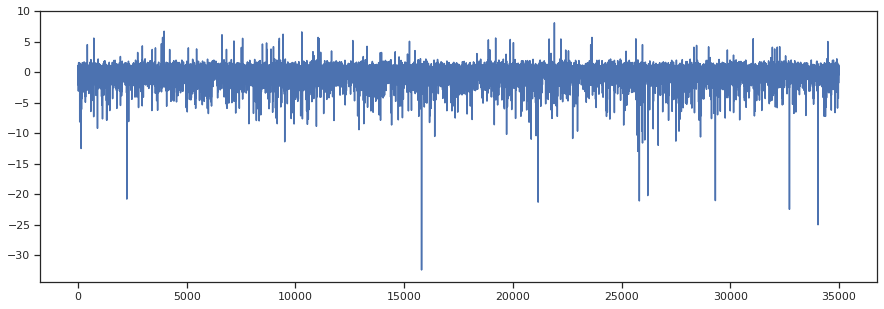

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.plot(y_train)

In [ ]:
from sklearn.svm import SVR
Model=SVR()
Model.fit(x_train,y_train)
print(f' Training MSE : {Model.score(x_train,y_train)}')
print(f' Testing MSE : {Model.score(x_test,y_test)}')

 Training MSE : 0.001451223322563755
 Testing MSE : 0.012130958994773677


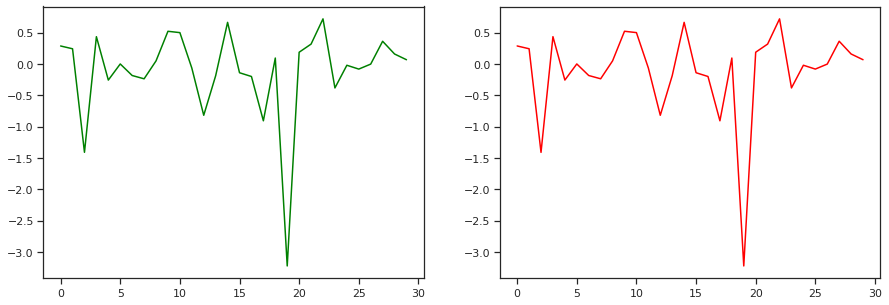

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
plt.plot(y_test[:30],color='green')
plt.subplot(1,2,2)
plt.plot(Model.predict(x_test[:30]),color='red')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor()
Model.fit(x_train,y_train)
print(f' Training MSE : {Model.score(x_train,y_train)}')
print(f' Testing MSE : {Model.score(x_test,y_test)}')

 Training MSE : 0.9988615703466608
 Testing MSE : 0.99093989864211


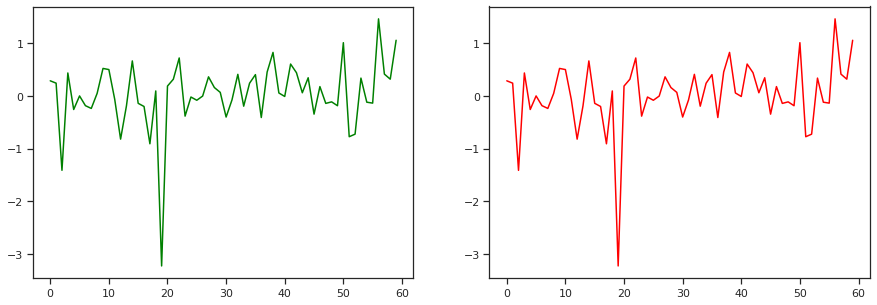

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
plt.plot(y_test[:60],color='green')
plt.subplot(1,2,2)
plt.plot(Model.predict(x_test[:60]),color='red')
plt.show()

## Sales Per Customer Prediction

In [ ]:
from sklearn.model_selection import train_test_split
X=Data.drop(columns=['Sales per customer'])[:50000].values
Y=Data['Sales per customer'][:50000].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor()
Model.fit(x_train,y_train)
print(f' Training R2 Score : {Model.score(x_train,y_train)}')
print(f' Testing R2 Score : {Model.score(x_test,y_test)}')

 Training R2 Score : 0.999979629522581
 Testing R2 Score : 0.9999830556867423


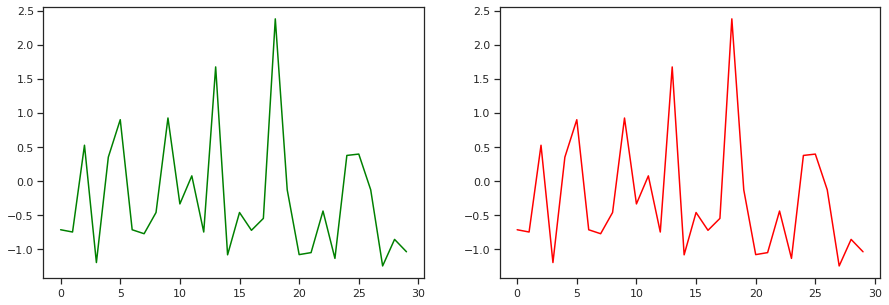

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
plt.plot(y_test[:30],color='green')
plt.subplot(1,2,2)
plt.plot(Model.predict(x_test[:30]),color='red')
plt.show()

## Sales Prediction

In [ ]:
from sklearn.model_selection import train_test_split
X=Data.drop(columns=['Sales'])[:50000].values
Y=Data['Sales'][:50000].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35000, 39), (15000, 39), (35000,), (15000,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor()
Model.fit(x_train,y_train)
print(f' Training R2 Score : {Model.score(x_train,y_train)}')
print(f' Testing R2 Score : {Model.score(x_test,y_test)}')

 Training R2 Score : 0.9999774182696114
 Testing R2 Score : 0.9999198489701437


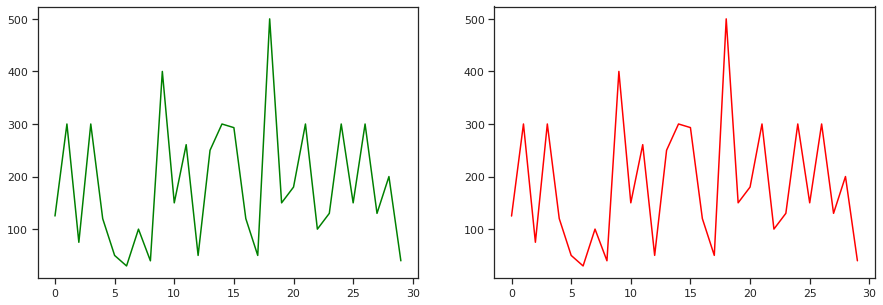

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
plt.subplot(1,2,1)
plt.plot(y_test[:30],color='green')
plt.subplot(1,2,2)
plt.plot(Model.predict(x_test[:30]),color='red')
plt.show()

## Forcast

In [ ]:
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.ar_model import AR
import statsmodels.api as st
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA,ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
Forcast['order date (DateOrders)']=pd.to_datetime(Forcast["order date (DateOrders)"]).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Forcast.dtypes

order date (DateOrders)     object
Sales                      float64
dtype: object

In [ ]:
Forcast.columns=["date","sales"]
Forcast.head()

,date,sales
0,2018-01-31,327.75
1,2018-01-13,327.75
2,2018-01-13,327.75
3,2018-01-13,327.75
4,2018-01-13,327.75


In [ ]:
Forcast.index=Forcast["date"]
Forcast.drop(columns=["date"],inplace=True)
Forcast.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sales
date,
2018-01-31,327.75
2018-01-13,327.75
2018-01-13,327.75
2018-01-13,327.75
2018-01-13,327.75


In [ ]:
Forcast.sort_index(inplace=True)
Forcast.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,sales
date,
2015-01-01,119.980003
2015-01-01,149.940002
2015-01-01,99.959999
2015-01-01,99.959999
2015-01-01,199.919998


In [ ]:
Forcast=Forcast.groupby('date').agg({'sales':'sum'})

In [ ]:
Forcast.head()

,sales
date,
2015-01-01,32806.090690
2015-01-02,29818.210575
2015-01-03,36348.710648
2015-01-04,35738.970669
2015-01-05,31067.910603


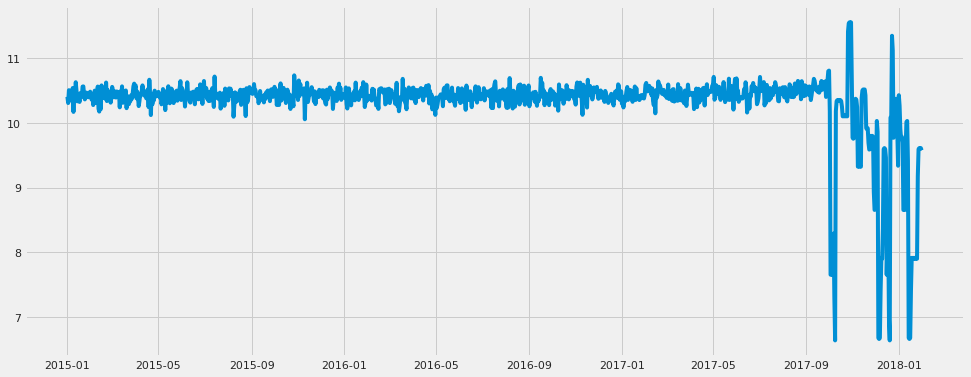

In [ ]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"]=(15,6)
plt.plot(np.log1p(Forcast["sales"]))
plt.show()

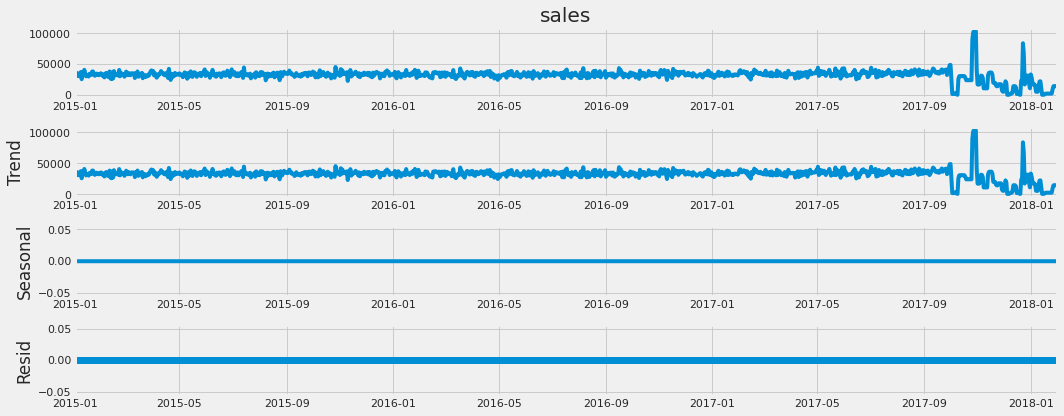

In [ ]:
st.tsa.seasonal_decompose(Forcast["sales"],model='additive', extrapolate_trend='freq', period=1).plot()
plt.show()

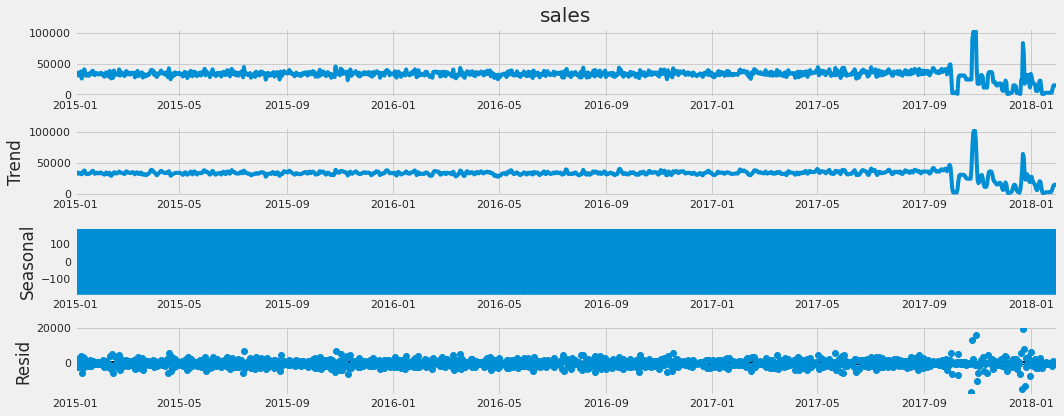

In [ ]:
st.tsa.seasonal_decompose(Forcast["sales"],model='additive', extrapolate_trend='freq', period=2).plot()
plt.show()

In [ ]:
Forcast["shifted_sales"]=Forcast["sales"]-Forcast["sales"].shift(1)
Forcast.head()

,sales,shifted_sales
date,,
2015-01-01,32806.090690,NaN
2015-01-02,29818.210575,-2987.880114
2015-01-03,36348.710648,6530.500073
2015-01-04,35738.970669,-609.739979
2015-01-05,31067.910603,-4671.060066


In [ ]:
adfuller(Forcast["sales"].dropna())

(-4.520962062159017,
 0.00018018334567566124,
 20,
 1106,
 {'1%': -3.4362763491428243,
  '5%': -2.8641567820457636,
  '10%': -2.568163254776674},
 22236.503694165178)

In [ ]:
adfuller(Forcast["shifted_sales"].dropna())

(-9.5739424530981,
 2.2494796646045035e-16,
 19,
 1106,
 {'1%': -3.4362763491428243,
  '5%': -2.8641567820457636,
  '10%': -2.568163254776674},
 22235.78946491551)

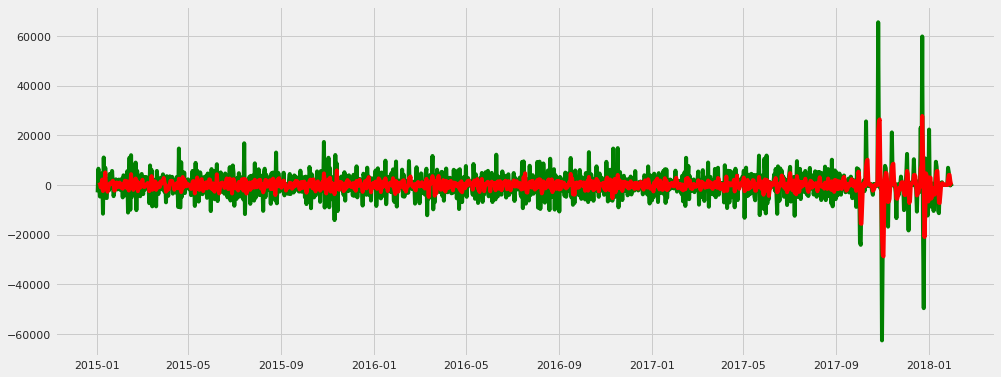

In [ ]:
Forcast["MA-Forcasted"]=Forcast["shifted_sales"].rolling(3).mean()
plt.rcParams["figure.figsize"]=(15,6)
plt.plot(Forcast["shifted_sales"],color="green")
plt.plot(Forcast["MA-Forcasted"],color="red")
plt.show()

## LSTM For Sales Forcasting

In [ ]:
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')

In [ ]:
X = Forcast['sales'].dropna().values
supervised = timeseries_to_supervised(X, 1)
supervised.head()

,0,0
0,0.000000,32806.090690
1,32806.090690,29818.210575
2,29818.210575,36348.710648
3,36348.710648,35738.970669
4,35738.970669,31067.910603


In [ ]:
import sklearn
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(supervised.values)
scaled_X = scaler.transform(supervised.values)
scaled_X


array([[-1.        , -0.37627451],
       [-0.36606588, -0.43444279],
       [-0.42380269, -0.30730651],
       ...,
       [-0.71223999, -0.72923719],
       [-0.71641043, -0.72503559],
       [-0.71223999, -0.73446281]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(scaled_X[:,0],scaled_X[:,1],test_size=0.2)

In [ ]:
x_train.shape

(901,)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, 1)
x_test = x_test.reshape(x_test.shape[0], 1,1)

In [ ]:
scaler.inverse_transform(scaled_X.reshape((scaled_X.shape[0],scaled_X.shape[1])))

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.LSTM(10, batch_input_shape=(1, 1, 1), stateful=True))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.005))

In [ ]:
hist=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
29/29 [==============================] - 2s 2ms/step - loss: 0.0900
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 11/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 12/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 13/100
29/29 [=================

(0.0, 0.05)

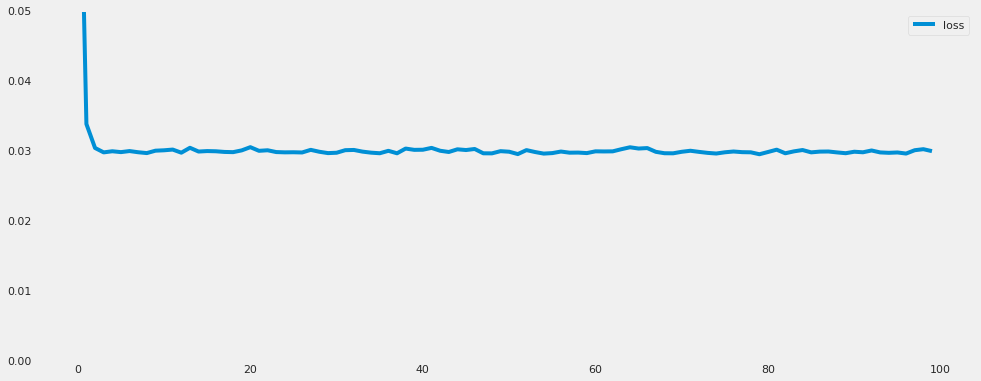

In [ ]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,0.05)

In [ ]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 1s 3ms/step - loss: 0.0288


0.028781840577721596

In [ ]:
preds=model.predict(x_test)

In [ ]:
preds.shape

(8, 1)

In [ ]:
def forecast(model, batch_size, row):
	X = row[0:-1]
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(x_test.reshape((226,1,1)), batch_size=batch_size)
	return yhat[0,0]

In [ ]:
forecast(model,1,x_test)

-0.39425752

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


Month=1, Predicted=2952.259774, Expected=2742.750000
Month=2, Predicted=2867.068498, Expected=2703.000000
Month=3, Predicted=2748.809996, Expected=2742.750000
Month=4, Predicted=2701.653415, Expected=2703.000000
Month=5, Predicted=2613.340190, Expected=2742.750000
Month=6, Predicted=2590.134486, Expected=2703.000000
Month=7, Predicted=2521.286211, Expected=9609.480285
Month=8, Predicted=7510.522544, Expected=14675.760496
Month=9, Predicted=11760.994416, Expected=14891.580504
Month=10, Predicted=12673.577098, Expected=14675.760496
Month=11, Predicted=13005.824837, Expected=14891.580504
Month=12, Predicted=13481.817419, Expected=14407.340474
Test RMSE: 3161.032


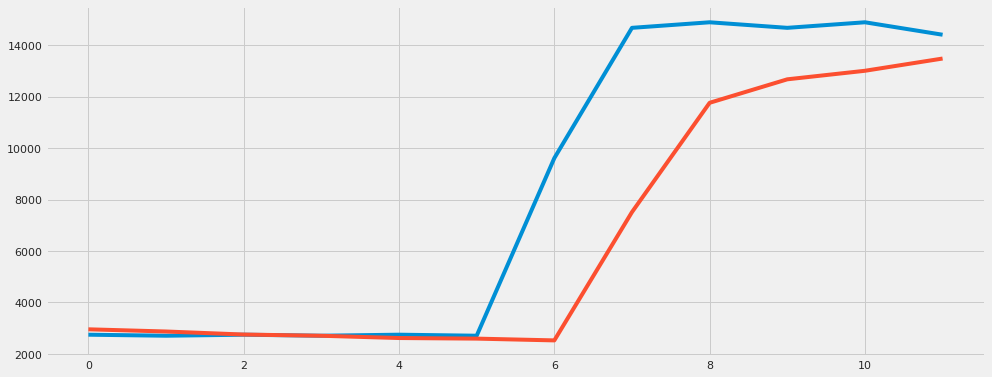

In [ ]:

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# load dataset
series = Forcast['sales']
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 10, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()